In [8]:
import sqlite3
import pandas as pd
from sqlite3 import Error
from matplotlib import pyplot as plt

In [2]:
def create_connection(db_file):    
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("connexion établie")
        return conn
    except Error as e:
        print(e)

    return conn

In [3]:
with open('orders.sql', 'r') as sql_file:
    sql_script = sql_file.read()

In [5]:
conn = sqlite3.connect('../data/marketplaces.db')
cur = conn.cursor()
cur.executescript(sql_script)

OperationalError: no such column: order_status

       Freight Value  Shipping Duration
0              13.29           1.214954
1              19.93           8.062083
2              17.87           6.029491
3              12.79           4.003229
4              18.14          13.289144
...              ...                ...
98602          43.41          15.449769
98603          36.53           6.518692
98604          16.95           1.881343
98605           8.72           1.122766
98606          12.79           3.156551

[98607 rows x 2 columns]


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_3324\1756294983.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


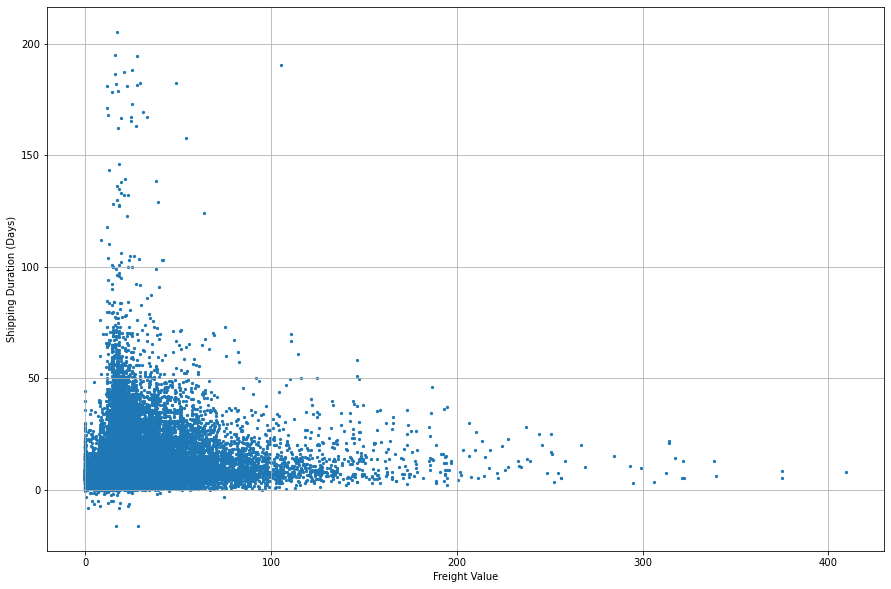

In [15]:
cur.execute('''
            SELECT DISTINCT
            freight_value,
            (JULIANDAY(order_delivered_customer_date)
            - JULIANDAY(order_delivered_carrier_date))
            FROM items INNER JOIN orders ON items.order_id = orders.order_id
            ''')
shipping_df = pd.DataFrame(cur.fetchall(), columns = ['Freight Value', 'Shipping Duration'])
print(shipping_df)

# plot
X = shipping_df['Freight Value']
Y = shipping_df['Shipping Duration']

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

ax.scatter(X, Y, s=5)
ax.grid()
ax.set_xlabel("Freight Value")
ax.set_ylabel("Shipping Duration (Days)")

fig.show()

In [17]:
cur.execute('''
            SELECT DISTINCT
            freight_value, product_weight_g, product_length_cm, product_height_cm, product_width_cm
            FROM items INNER JOIN products ON items.product_id = products.product_id
            ''')
dimension_df = pd.DataFrame(cur.fetchall(), columns = ['Freight Value', 'Product Weight (g)', 'Product Length (cm)', 'Product Height (cm)', 'Product Width (cm)'])
print(dimension_df)

       Freight Value  Product Weight (g)  Product Length (cm)  \
0              13.29               650.0                 28.0   
1              19.93             30000.0                 50.0   
2              17.87              3050.0                 33.0   
3              12.79               200.0                 16.0   
4              18.14              3750.0                 35.0   
...              ...                 ...                  ...   
68315          44.02              2700.0                 60.0   
68316          10.96               100.0                 60.0   
68317          22.06               200.0                 25.0   
68318          43.41             10150.0                 89.0   
68319          36.53              8950.0                 45.0   

       Product Height (cm)  Product Width (cm)  
0                      9.0                14.0  
1                     30.0                40.0  
2                     13.0                33.0  
3                     1